# Excercize 3

In [2]:
import pandas as pd

/var/folders/x5/spm_6r5944dfgx3qj8my0m440000gn/T/ipykernel_16991/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_Fraud = pd.read_csv('./Datasets/df_FraudReElaborated.csv')

## KNN

In [4]:
from sklearn.model_selection import train_test_split

In [10]:
df_sample = pd.concat([df_Fraud[df_Fraud['isFraud'] == 0].sample(13000), df_Fraud[df_Fraud['isFraud'] == 1].sample(13000)])



In [11]:
df_sample['isFraud'].value_counts()

isFraud
0.0    13000
1.0    13000
Name: count, dtype: int64

In [12]:
X_trainSampled, X_testSampled, y_trainSampled, y_testSampled = train_test_split(df_sample.drop('isFraud', axis=1), df_sample['isFraud'], test_size=0.3, random_state=10)

In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 470721 to 143734
Columns: 156 entries, TransactionID to 90
dtypes: float64(156)
memory usage: 31.1 MB


In [14]:
df_Fraud['isFraud'].value_counts()

isFraud
0.0    569877
1.0     20663
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_Fraud.drop('isFraud', axis=1), df_Fraud['isFraud'], test_size=0.99, random_state=10)

In [16]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import torch
param_grid = {'classifier__n_neighbors': range(1, 11)}

pipeline = Pipeline([('classifier', KNeighborsClassifier())])

gridKn = GridSearchCV(pipeline, param_grid, cv=5,scoring='roc_auc')
gridKn.fit(X_trainSampled, y_trainSampled)

print("Best cross-validation accuracy: {:.2f}".format(gridKn.best_score_))
print("Best set score: {:.2f}".format(gridKn.score(X_testSampled, y_testSampled)))
print("Best parameters: ", gridKn.best_params_)

Best cross-validation accuracy: 0.60
Best set score: 0.63
Best parameters:  {'classifier__n_neighbors': 2}


In [17]:
print("Best set score: {:.2f}".format(gridKn.score(X_test, y_test)))

Best set score: 0.70


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_true = y_testSampled
y_pred = gridKn.predict(X_testSampled)
# Assuming you have the predicted labels in y_pred and the true labels in y_true
precision_knn = precision_score(y_true, y_pred)
recall_knn = recall_score(y_true, y_pred)
f1_knn = f1_score(y_true, y_pred)
auc_knn = roc_auc_score(y_true, y_pred)

print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("AUC:", auc_knn)


Precision: 0.659606656580938
Recall: 0.4433146924250127
F1 Score: 0.5302523563393129
AUC: 0.6052579670091954


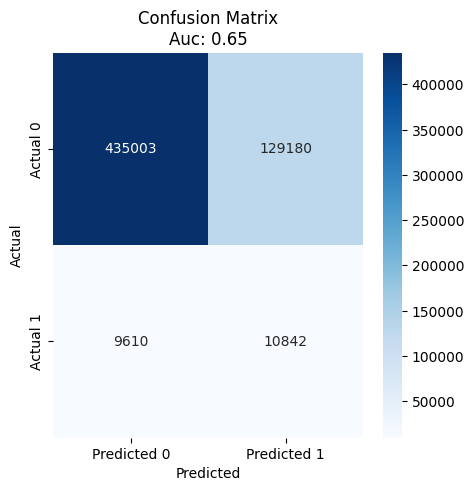

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = gridKn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix\nAuc: {auc:.2f}")
plt.show()

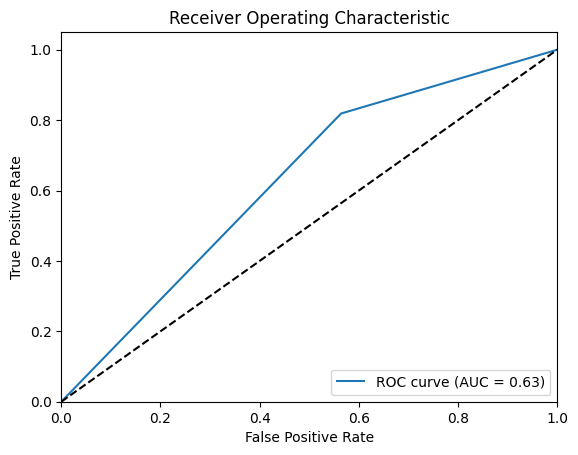

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities in y_pred_prob and the true labels in y_true
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
aucK = roc_auc_score(y_true, y_pred)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

Lreg = LinearRegression()

In [25]:
Lreg.fit(X_trainSampled, y_trainSampled)

LinearRegression()

In [26]:
Lreg.score(X_testSampled, y_testSampled)

0.26465630227375336

In [27]:
Lreg.score(X_test, y_test)

-4.207411381783323

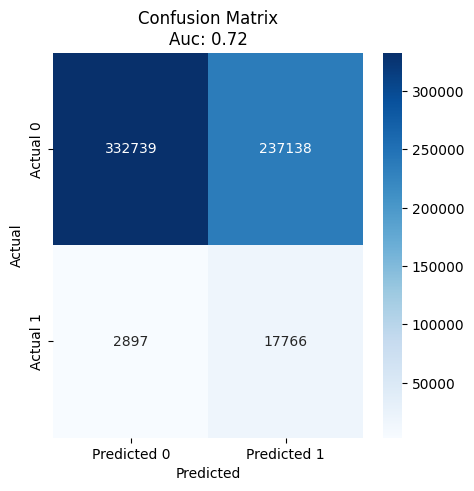

In [83]:

y_pred = Lreg.predict(df_Fraud.drop('isFraud', axis=1))
y_pred_binary = (y_pred > 0.4).astype(int)
y_test = df_Fraud['isFraud']
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
auc_lr = roc_auc_score(y_test, y_pred_binary)
precision_lr = precision_score(y_test, y_pred_binary)
recall_lr = recall_score(y_test, y_pred_binary)
f1_lr = f1_score(y_test, y_pred_binary)
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\nAuc: {:.2f}".format(auc_lr))
plt.show()


## Ridge

In [32]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error


pipeline = Pipeline([
    ('regressor', Ridge())
])

param_grid = {
    'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100 ,1000]
}

ridge = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
ridge.fit(X_trainSampled, y_trainSampled)

/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.45439e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.46649e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.46983e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.47001e-19): result may not be accurate.
  return linalg.solve(A, 

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100,
                                              1000]})

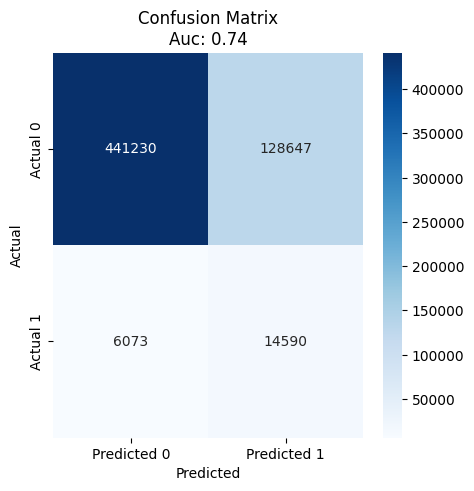

In [82]:
# Convert continuous target variable to binary
y_pred = ridge.predict(df_Fraud.drop('isFraud', axis=1))
y_pred_binary = (y_pred > 0.517).astype(int)
y_test = df_Fraud['isFraud']
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

auc_r = roc_auc_score(y_test, y_pred_binary)
precision_r = precision_score(y_test, y_pred_binary)
recall_r = recall_score(y_test, y_pred_binary)
f1_r = f1_score(y_test, y_pred_binary)
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\nAuc: {:.2f}".format(auc_r))
plt.show()


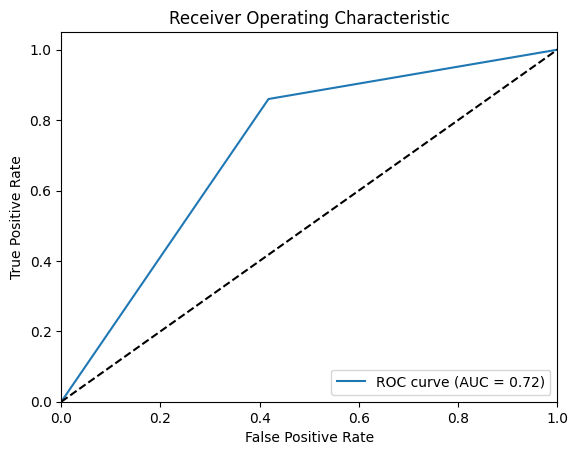

In [55]:
# Assuming you have the predicted probabilities in y_pred_prob and the true labels in y_true
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Lasso

In [56]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import Lasso


pipeline = Pipeline([
    ('regressor', Lasso())
])

param_grid = {
    'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100 ,1000]
}

lasso = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
lasso.fit(X_trainSampled, y_trainSampled)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', Lasso())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100,
                                              1000]})

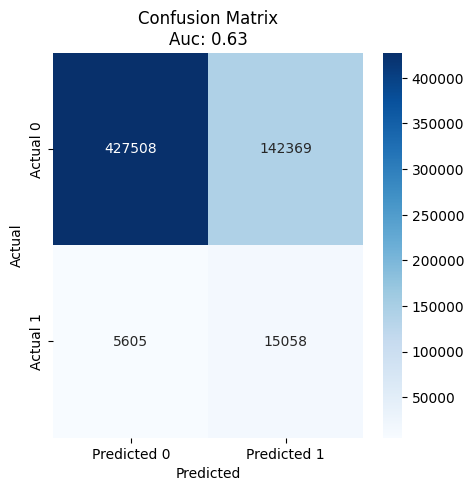

In [84]:
# Convert continuous target variable to binary
y_pred = lasso.predict(df_Fraud.drop('isFraud', axis=1))
y_pred_binary = (y_pred > 0.5).astype(int)
y_test = df_Fraud['isFraud']
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
auc_ls = roc_auc_score(y_test, y_pred_binary)
precision_ls = precision_score(y_test, y_pred_binary)
recall_ls = recall_score(y_test, y_pred_binary)
f1_ls = f1_score(y_test, y_pred_binary)
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\nAuc: {:.2f}".format(auc))
plt.show()

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10,1000,10000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000, 10000]
}

# Create a logistic regression model
logreg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5,scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_trainSampled, y_trainSampled)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best parameters:  {'C': 0.01, 'max_iter': 10000, 'penalty': 'l2'}
Best score:  0.7409864568513956


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=100, penalty='l2')
logreg.fit(X_trainSampled, y_trainSampled)

/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

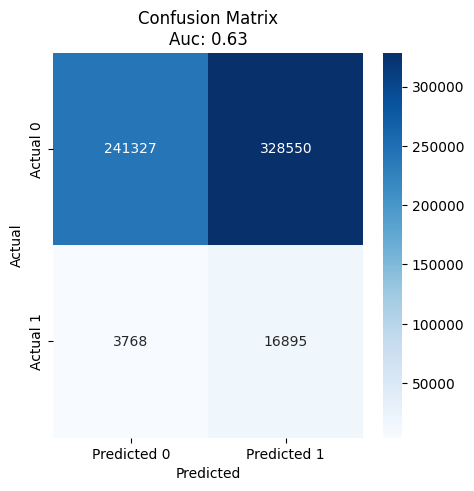

In [85]:
# Convert continuous target variable to binary
y_pred = logreg.predict(df_Fraud.drop('isFraud', axis=1))
#y_pred_binary = (y_pred > 0.3).astype(int)
y_test = df_Fraud['isFraud']
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
auc_lor = roc_auc_score(y_test, y_pred)
precision_lor = precision_score(y_test, y_pred)
recall_lor = recall_score(y_test, y_pred)
f1_lor = f1_score(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\nAuc: {:.2f}".format(auc))
plt.show()

In [87]:
import pandas as pd

# Create a dictionary with the model names and corresponding metrics
data = {
    'Model': ['KNN', 'Linear Regression', 'Ridge', 'Lasso', 'Logistic Regression'],
    'Precision': [precision_knn, precision_lr, precision_r, precision_ls, precision_lor],
    'Recall': [recall_knn, recall_lr, recall_r, recall_ls, recall_lor],
    'F1 Score': [f1_knn, f1_lr, f1_r, f1_ls, f1_lor],
    'AUC': [auc_knn, auc_lr, auc_r, auc_ls, auc_lor]
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(data)

# Set the 'Model' column as the index
df_metrics.set_index('Model', inplace=True)

# Display the DataFrame
df_metrics


,Precision,Recall,F1 Score,AUC
Model,,,,
KNN,0.659607,0.443315,0.530252,0.605258
Linear Regression,0.069697,0.859798,0.128941,0.721838
Ridge,0.101859,0.706093,0.178035,0.740174
Lasso,0.095651,0.728742,0.169106,0.739459
Logistic Regression,0.048908,0.817645,0.092295,0.620559


### We can see that based just on the AUC ridge is the best model, even if it lacks a lot on precision and it s mostly random